In [1]:
import pandas as pd
import numpy as np
import sklearn

## Input data

In [2]:
data1=pd.read_csv("BLI_02012019080916605.csv")
data2=pd.read_csv("WEO_Data.xls",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")[:-1]

## prepare data1

In [3]:
data1=data1[data1["INEQUALITY"]=="TOT"]
data1=data1.pivot(index="Country", columns="Indicator", values="Value")[["Life satisfaction"]]

## prepare data2

In [4]:
data2=pd.read_csv("WEO_Data.xls",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")[:-1]
data2=data2[["Country","2015"]]
data2=data2.set_index("Country")

## merge data

In [5]:
new_data=data1.join(data2)
new_data.columns=['Life satisfaction', 'GDP']
new_data.dropna(inplace=True)

## Train model

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg_model =LinearRegression()

In [7]:
lin_reg_model.fit(new_data["GDP"].values.reshape(-1,1), new_data["Life satisfaction"].values.reshape(-1,1))
X_new = [[22587]] # Cyprus' GDP per capita 
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]
#The data has changed 

[[6.24626328]]


## Plot the point

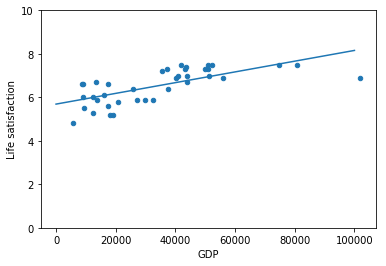

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
new_data.plot(kind="scatter",y='Life satisfaction', x='GDP',ylim=(0,10))
x = np.linspace(0,100000,100)
plt.plot(x,lin_reg_model.coef_[0] * x + lin_reg_model.intercept_)